In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Store filepath in a variable
file_one = "acquisitions-10-24-2018.csv"
# Read our Data file with the pandas library
file_one_df = pd.read_csv(file_one)
# Show dataframe with company and date acquired only
file_one_df[["Transaction Name", "Announced Date"]]

,Transaction Name,Announced Date
0,21st Century Fox acquired by The Walt Disney C...,2017-12-14
1,BAMTECH Media acquired by The Walt Disney Company,2017-08-08
2,MakieLab acquired by The Walt Disney Company,2017-02-22
3,Maker Studios acquired by The Walt Disney Company,2014-03-24
4,Lucasfilm acquired by The Walt Disney Company,2012-10-30
5,UTV Software Communications acquired by The Wa...,2012-02-01
6,Babble acquired by The Walt Disney Company,2011-11-14
7,Rocket Pack acquired by The Walt Disney Company,2011-03-03
8,Playdom acquired by The Walt Disney Company,2010-07-27
9,Tapulous acquired by The Walt Disney Company,2010-07-01


In [3]:
#read in second CSV file for revenue
file_two="../Disney_Datasets/disney_revenue_1991-2017.csv"
#make dataframe
file_two_df = pd.read_csv(file_two)
#display
file_two_df

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525
5,1996,10095.0,NaN,NaN,4502.0,"4,142",18739
6,1997,6981.0,3782.0,174.0,5014.0,6522,22473
7,1998,6849.0,3193.0,260.0,5532.0,7142,22976
8,1999,6548.0,3030.0,206.0,6106.0,7512,23402
9,2000,5994.0,2602.0,368.0,6803.0,9615,25402


In [4]:
#create df for types of rev
file_two_df.rename(columns={'Studio Entertainment[NI 1]':'Studio Entertainment', 'Disney Consumer Products[NI 2]':'Disney Consumer Products','Disney Interactive[NI 3][Rev 1]','Walt Disney Parks and Resorts','Disney Media Networks'})
rev_specific=file_two_df[['Studio Entertainment[NI 1]','Disney Consumer Products[NI 2]','Disney Interactive[NI 3][Rev 1]','Walt Disney Parks and Resorts','Disney Media Networks']]
rev_specific.head()

,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks
0,2593.0,724.0,NaN,2794.0,NaN
1,3115.0,1081.0,NaN,3306.0,NaN
2,3673.4,1415.1,NaN,3440.7,NaN
3,4793.0,1798.2,NaN,3463.6,359
4,6001.5,2150.0,NaN,3959.8,414


In [8]:
#find total revenue for each category
df1=rev_specific.sum(axis=0)
df1

Studio Entertainment[NI 1]         179599.9
Disney Consumer Products[NI 2]      72546.3
Disney Interactive[NI 3][Rev 1]      8564.0
Walt Disney Parks and Resorts      239743.1
dtype: float64

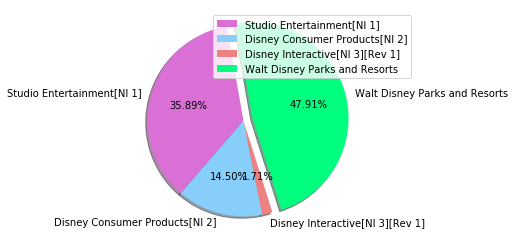

In [10]:
#pie chart for types of revenue

# Calculate Type Percents
df1
df1.index

# Build Pie Chart

#Set the colors of each section of the pie chart.
colors = ["orchid", "lightskyblue", "lightcoral", "springgreen"]

#Only explode the third section of the pie chart.
explode = (0,0,0, 0.1)

#Create the pie chart.
plt.pie(df1, labels = df1.index, autopct = "%.2f%%", colors = colors, explode= explode, shadow = True, startangle = 100)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")
plt.savefig("pie_chart")
plt.show()

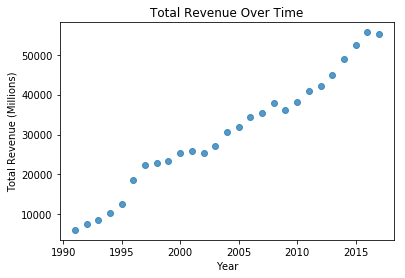

In [6]:
#Revenue over time
plt.scatter(file_two_df["Year"],file_two_df["Total"], alpha = 0.75)

plt.title("Total Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Total Revenue (Millions)")
plt.savefig("Total Revenue")
plt.show()

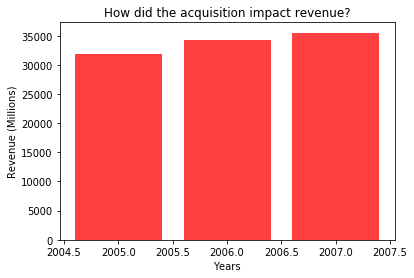

In [7]:
#compare revenue in year before, during, after acquisition of Pixar
#how do I pull from df and not enter lists manually???

years=[2005,2006,2007]
revenue=[31944,34285,35510]

#create components for bar graph
x_axis = np.arange(0,len(years))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("How did the acquisition impact revenue?")
plt.xlabel("Years")
plt.ylabel("Revenue (Millions)")

plt.bar(years, revenue, facecolor="red",alpha=0.75, align="center")
plt.savefig("Pixar Bar Graph")

#show graph
plt.show()

In [17]:
#create dataframe with max rev each year
new_df=file_two_df.groupby(['Year'], as_index=False)['Total'].max()
new_df.head()

,Year,Total
0,1991,6111
1,1992,7502
2,1993,8529
3,1994,10414
4,1995,12525


In [ ]:
#statistical analysis